This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [82]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [83]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [84]:
train_labels[0]

1

In [85]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [86]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [87]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [88]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [89]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [90]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [91]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [92]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [93]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.50544

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2024-05-17 11:31:57.271437: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-17 11:31:57.950753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5102 - accuracy: 0.7974

2024-05-17 11:32:02.474647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 6s 91ms/step - loss: 0.5102 - accuracy: 0.7974 - val_loss: 0.3917 - val_accuracy: 0.8655
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3091 - accuracy: 0.8987 - val_loss: 0.3082 - val_accuracy: 0.8868
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2270 - accuracy: 0.9267 - val_loss: 0.3058 - val_accuracy: 0.8770
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1787 - accuracy: 0.9433 - val_loss: 0.2833 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1484 - accuracy: 0.9521 - val_loss: 0.2801 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1210 - accuracy: 0.9630 - val_loss: 0.2881 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1010 - accuracy: 0.9695 - val_loss: 0.3559 - val_accuracy: 0.8696
Epoch 8/20
30/30 [======

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

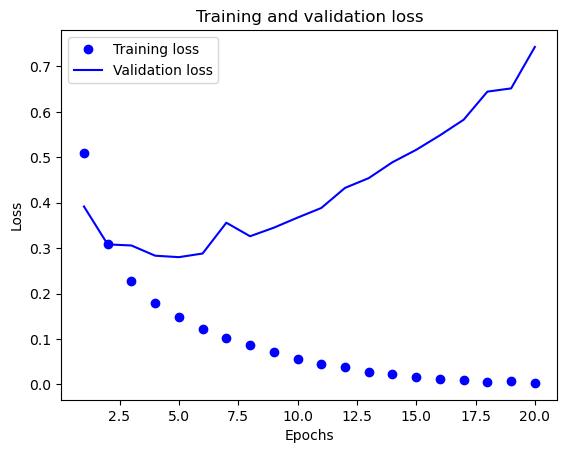

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

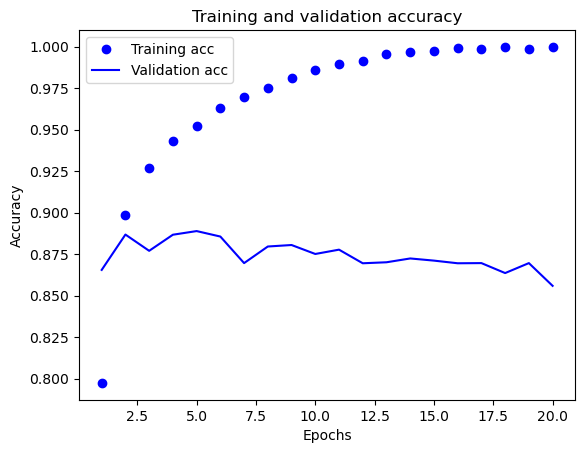

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4


2024-05-17 11:34:55.426040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 3s 45ms/step - loss: 0.4324 - accuracy: 0.8277
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2481 - accuracy: 0.9112
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1932 - accuracy: 0.9306
Epoch 4/4
  1/782 [..............................] - ETA: 2:48 - loss: 0.3400 - accuracy: 0.8438

2024-05-17 11:35:01.510737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 5s 6ms/step - loss: 0.2974 - accuracy: 0.8827


In [17]:
results

[0.29744186997413635, 0.8827199935913086]

### Using a trained model to generate predictions on new data

In [18]:
model.predict(x_test)

 65/782 [=>............................] - ETA: 1s

2024-05-17 11:38:47.823489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 2s 2ms/step


array([[0.15663621],
       [0.9995851 ],
       [0.93371326],
       ...,
       [0.11920581],
       [0.07967947],
       [0.61492443]], dtype=float32)

### Further experiments

#### 기본 모델

In [32]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
base_history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20


2024-05-17 12:06:09.384969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5017 - accuracy: 0.7837

2024-05-17 12:06:11.068648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 50ms/step - loss: 0.5017 - accuracy: 0.7837 - val_loss: 0.3769 - val_accuracy: 0.8658
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2933 - accuracy: 0.9034 - val_loss: 0.3216 - val_accuracy: 0.8712
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2200 - accuracy: 0.9264 - val_loss: 0.3025 - val_accuracy: 0.8768
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1730 - accuracy: 0.9431 - val_loss: 0.2740 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1405 - accuracy: 0.9557 - val_loss: 0.2812 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1134 - accuracy: 0.9654 - val_loss: 0.2963 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0989 - accuracy: 0.9690 - val_loss: 0.3138 - val_accuracy: 0.8833
Epoch 8/20
30/30 [======

In [ ]:
# def build_model(unit):
#     model = keras.Sequential([
#     layers.Dense(16, activation="relu"),
#     layers.Dense(16, activation="relu"),
#     layers.Dense(1, activation="sigmoid")
#     ])
#     model.compile(optimizer="rmsprop",
#                   loss="binary_crossentropy",
#                   metrics=["accuracy"])
#     history = model.fit(x_train, y_train, epochs=4, batch_size=512)
#     # results = model.evaluate(x_test, y_test)
#     return history

#### 1개 또는 3개의 표현 층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인

In [27]:
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
# results1 = model.evaluate(x_test, y_test)
# print(results1)

Epoch 1/20


2024-05-17 12:00:28.002496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4842 - accuracy: 0.8097

2024-05-17 12:00:29.583346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 49ms/step - loss: 0.4842 - accuracy: 0.8097 - val_loss: 0.4009 - val_accuracy: 0.8458
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3089 - accuracy: 0.9032 - val_loss: 0.3237 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2401 - accuracy: 0.9251 - val_loss: 0.2969 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1976 - accuracy: 0.9406 - val_loss: 0.2774 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1686 - accuracy: 0.9482 - val_loss: 0.2748 - val_accuracy: 0.8900
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1446 - accuracy: 0.9571 - val_loss: 0.3024 - val_accuracy: 0.8784
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1266 - accuracy: 0.9643 - val_loss: 0.2865 - val_accuracy: 0.8875
Epoch 8/20
30/30 [======

In [28]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results2 = model2.evaluate(x_test, y_test)
# results

Epoch 1/20


2024-05-17 12:00:51.915674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5068 - accuracy: 0.7831

2024-05-17 12:00:53.510340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 49ms/step - loss: 0.5068 - accuracy: 0.7831 - val_loss: 0.3717 - val_accuracy: 0.8695
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2942 - accuracy: 0.9019 - val_loss: 0.2940 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2063 - accuracy: 0.9286 - val_loss: 0.2969 - val_accuracy: 0.8820
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1622 - accuracy: 0.9442 - val_loss: 0.2851 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1219 - accuracy: 0.9613 - val_loss: 0.3087 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0994 - accuracy: 0.9693 - val_loss: 0.3214 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0780 - accuracy: 0.9774 - val_loss: 0.4363 - val_accuracy: 0.8589
Epoch 8/20
30/30 [======

In [ ]:
# model.predict(x_test)

In [25]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']
    
    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']
    
    epochs = range(1, len(h1_loss) + 1)
    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']
    
    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

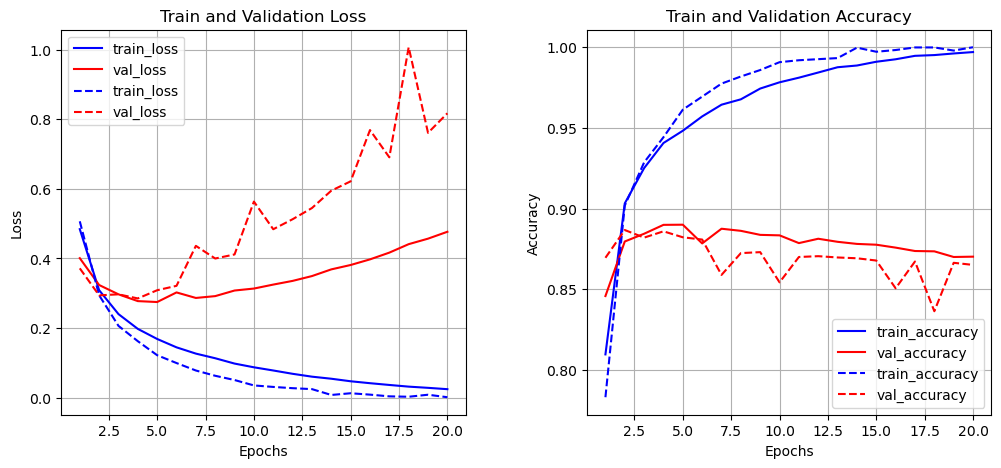

In [29]:
diff_history(history1, history2)

#### 층의 유닛을 추가하거나 줄여보기 (32개의 유닛, 64개의 유닛 등)

In [30]:
model2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2024-05-17 12:05:02.299029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4829 - accuracy: 0.7735

2024-05-17 12:05:04.389327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 65ms/step - loss: 0.4829 - accuracy: 0.7735 - val_loss: 0.4322 - val_accuracy: 0.8067
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2614 - accuracy: 0.9077 - val_loss: 0.3747 - val_accuracy: 0.8425
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1881 - accuracy: 0.9331 - val_loss: 0.2945 - val_accuracy: 0.8825
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1550 - accuracy: 0.9439 - val_loss: 0.2839 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1116 - accuracy: 0.9626 - val_loss: 0.2990 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0768 - accuracy: 0.9757 - val_loss: 0.3644 - val_accuracy: 0.8723
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0619 - accuracy: 0.9803 - val_loss: 0.3616 - val_accuracy: 0.8824
Epoch 8/20
30/30 [======

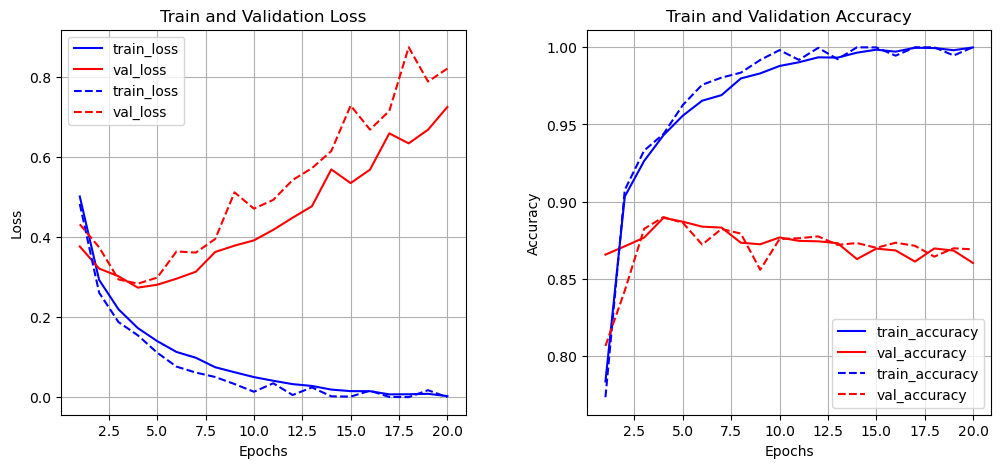

In [33]:
diff_history(base_history,history2)

#### binary_crossentropy 대신 mse

In [34]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history2 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2024-05-17 12:09:28.695121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.1719 - accuracy: 0.7808

2024-05-17 12:09:30.328601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 53ms/step - loss: 0.1719 - accuracy: 0.7808 - val_loss: 0.1209 - val_accuracy: 0.8704
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0918 - accuracy: 0.9026 - val_loss: 0.1145 - val_accuracy: 0.8458
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0644 - accuracy: 0.9306 - val_loss: 0.0852 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0483 - accuracy: 0.9495 - val_loss: 0.0845 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0396 - accuracy: 0.9584 - val_loss: 0.0860 - val_accuracy: 0.8809
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0328 - accuracy: 0.9665 - val_loss: 0.0902 - val_accuracy: 0.8751
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0261 - accuracy: 0.9757 - val_loss: 0.0877 - val_accuracy: 0.8799
Epoch 8/20
30/30 [======

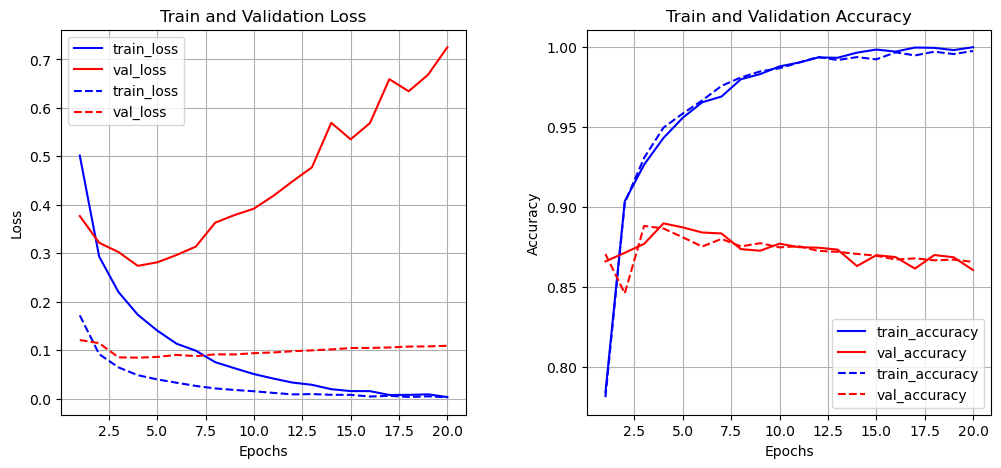

In [35]:
diff_history(base_history,history2)

#### relu 대신 tanh 활성화 함수 사용

In [36]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history2 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2024-05-17 12:10:29.152420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4659 - accuracy: 0.8038

2024-05-17 12:10:30.923207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 57ms/step - loss: 0.4659 - accuracy: 0.8038 - val_loss: 0.3690 - val_accuracy: 0.8498
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2643 - accuracy: 0.9098 - val_loss: 0.2840 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1901 - accuracy: 0.9337 - val_loss: 0.3029 - val_accuracy: 0.8735
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1475 - accuracy: 0.9503 - val_loss: 0.2828 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1114 - accuracy: 0.9631 - val_loss: 0.3155 - val_accuracy: 0.8808
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0892 - accuracy: 0.9706 - val_loss: 0.3466 - val_accuracy: 0.8775
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0700 - accuracy: 0.9781 - val_loss: 0.3861 - val_accuracy: 0.8749
Epoch 8/20
30/30 [======

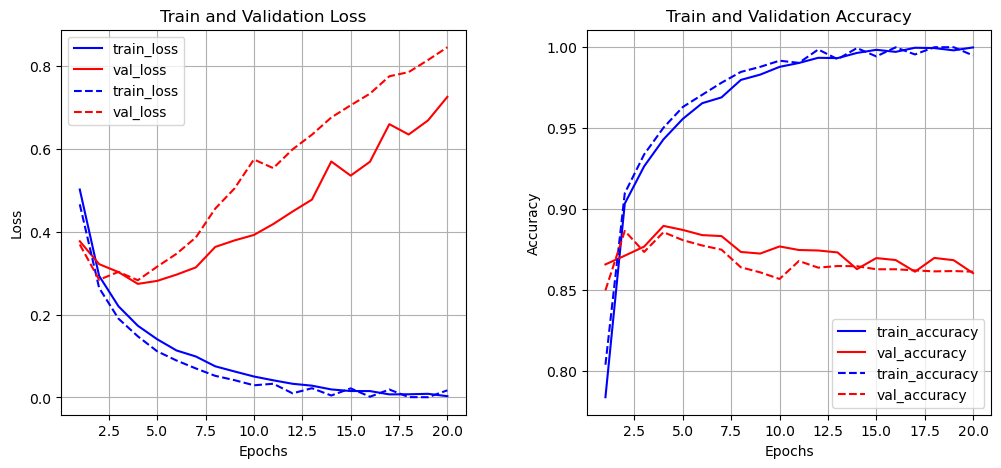

In [37]:
diff_history(base_history,history2)

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [94]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [95]:
len(train_data)

8982

In [96]:
len(test_data)

2246

In [41]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [101]:
from collections import Counter
import seaborn as sns

sns.barplot(Counter(test_labels))

**Decoding newswires back to text**

In [42]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [43]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [44]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [45]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [46]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [47]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [48]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [49]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [50]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2024-05-17 12:26:46.650465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 2.4565 - accuracy: 0.5442

2024-05-17 12:26:48.047462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 70ms/step - loss: 2.4565 - accuracy: 0.5442 - val_loss: 1.6463 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.3594 - accuracy: 0.7070 - val_loss: 1.2826 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0198 - accuracy: 0.7747 - val_loss: 1.1293 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.8053 - accuracy: 0.8249 - val_loss: 1.0564 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6389 - accuracy: 0.8636 - val_loss: 1.0252 - val_accuracy: 0.7750
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5132 - accuracy: 0.8945 - val_loss: 0.9405 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.4103 - accuracy: 0.9129 - val_loss: 0.9204 - val_accuracy: 0.8080
Epoch 8/20
16/16 [======

**Plotting the training and validation loss**

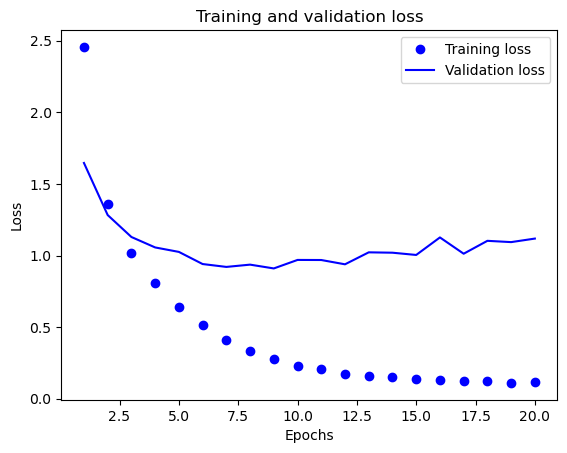

In [51]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

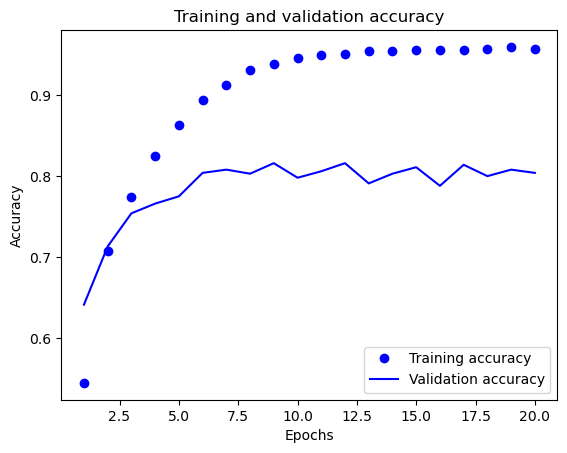

In [52]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [108]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [110]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

In [54]:
results

[0.9412561058998108, 0.7956367135047913]

In [55]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18388245770258238

### Generating predictions on new data

In [56]:
predictions = model.predict(x_test)

12/71 [====>.........................] - ETA: 0s

2024-05-17 12:31:35.040192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 0s 6ms/step


In [57]:
predictions[0].shape

(46,)

In [58]:
np.sum(predictions[0])

1.0000001

In [59]:
np.argmax(predictions[0])

4

### A different way to handle the labels and the loss

In [60]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [61]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [63]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history1 = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20


2024-05-17 12:37:12.655595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 3.0845 - accuracy: 0.1976

2024-05-17 12:37:14.393774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 25ms/step - loss: 3.0845 - accuracy: 0.1976 - val_loss: 2.4469 - val_accuracy: 0.3740
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 2.0584 - accuracy: 0.4589 - val_loss: 1.7600 - val_accuracy: 0.5870
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 1.5754 - accuracy: 0.6111 - val_loss: 1.5861 - val_accuracy: 0.6120
Epoch 4/20
63/63 [==============================] - 1s 20ms/step - loss: 1.3783 - accuracy: 0.6477 - val_loss: 1.4850 - val_accuracy: 0.6340
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.2127 - accuracy: 0.6878 - val_loss: 1.4070 - val_accuracy: 0.6490
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 1.0857 - accuracy: 0.7070 - val_loss: 1.3794 - val_accuracy: 0.6580
Epoch 7/20
63/63 [==============================] - 1s 22ms/step - loss: 0.9804 - accuracy: 0.7325 - val_loss: 1.4027 - val_accuracy: 0.6730
Epoch 8/20
63/63 [======

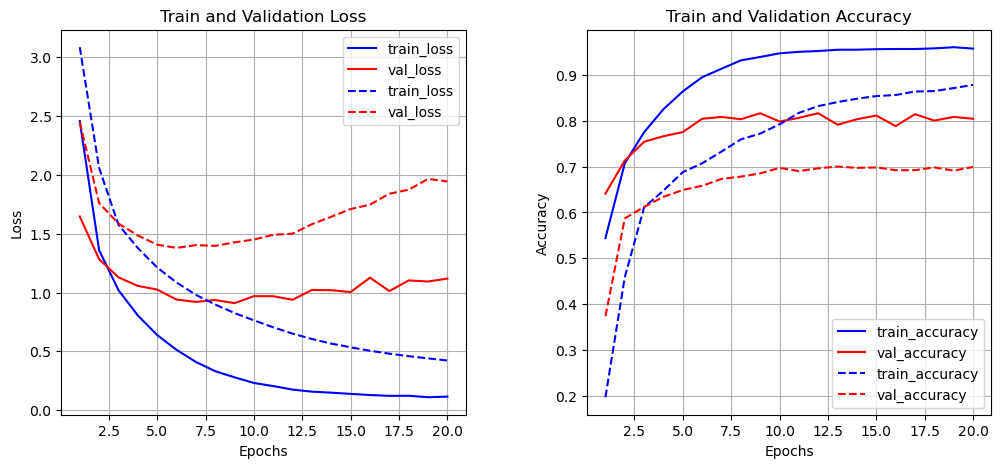

In [64]:
diff_history(history, history1)

|### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [65]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [66]:
train_data.shape

(404, 13)

In [67]:
test_data.shape

(102, 13)

In [68]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [69]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [70]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [71]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0


2024-05-17 12:52:03.628291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-17 12:52:14.869479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2024-05-17 12:52:15.997039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-17 12:52:24.356595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2024-05-17 12:52:25.094033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-17 12:52:33.465164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2024-05-17 12:52:33.797263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-17 12:52:41.785469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [72]:
all_scores

[1.8963096141815186, 2.389479875564575, 2.522312879562378, 2.2923998832702637]

In [73]:
np.mean(all_scores)

2.275125563144684

**Saving the validation logs at each fold**

In [74]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0


2024-05-17 12:53:22.318497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-17 12:53:22.834675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2024-05-17 12:54:18.266660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-17 12:54:18.889094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2024-05-17 12:55:07.347223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-17 12:55:07.802206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2024-05-17 12:55:49.863658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-17 12:55:50.448595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


**Building the history of successive mean K-fold validation scores**

In [75]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

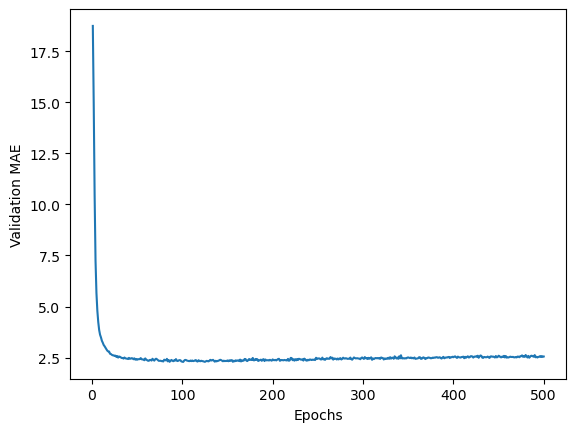

In [76]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

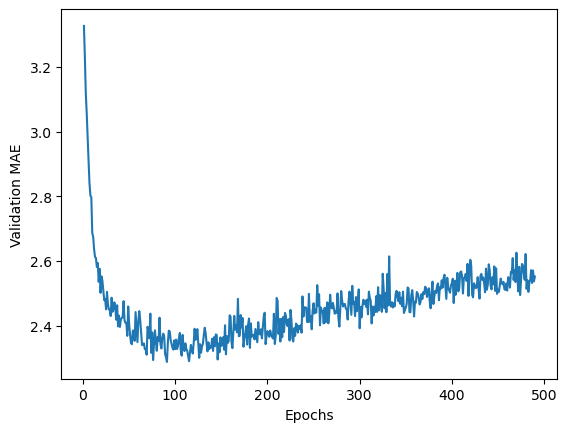

In [77]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [78]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2024-05-17 12:56:32.086205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/4 [======>.......................] - ETA: 0s - loss: 6.4900 - mae: 2.0470

2024-05-17 12:56:44.332491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 124ms/step - loss: 15.1006 - mae: 2.5197


In [79]:
test_mae_score

2.5196759700775146

### Generating predictions on new data

In [80]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 5ms/step


2024-05-17 12:56:44.795300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([8.542551], dtype=float32)

### Wrapping up

## Summary